In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 磅美汇率桶法正态分布

0.9997999199679872


<AxesSubplot: >

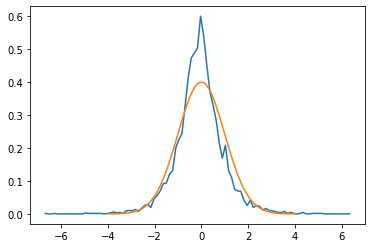

In [42]:
data = pd.read_csv('GBPUSD.csv')
data['return'] = data['收盘'].pct_change()

mean = data['return'].mean()
std = data['return'].std()

data['norm_std'] = (data['return'] - mean) / std
norms = data['norm_std'].iloc[1:]

num_buckets = 100
ranger = np.linspace(min(norms), max(norms), num_buckets)
# count the number of elements in each element of the ranger
buckets = []
for i in range(num_buckets - 1):
    buckets.append(len(norms[(norms >= ranger[i]) & (norms < ranger[i + 1])]))
    
# change to pdf
buckets = np.array(buckets) / len(norms) / (ranger[1] - ranger[0])
area = np.sum(buckets * (ranger[1] - ranger[0]))
print(area)
sns.lineplot(x=ranger[:-1], y=buckets)

# plot the normal distribution with mean 0 and std 1
import random
from scipy.stats import norm
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, 0, 1)
sns.lineplot(x=x, y=y)


## 标普指数对数随机游走

0.00047052316896894515 4.605247857519268


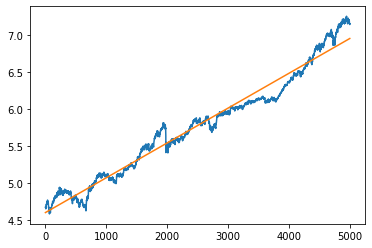

In [83]:
data = pd.read_csv('SP500.csv')
closed = data['收盘'].apply(lambda x: np.float64(x.replace(',', '')))
closed = closed.tolist()[::-1]

# log plot
log_closed = np.log(closed)
plt.plot(log_closed)

# use a line to fit the log plot
x = np.arange(len(log_closed))
y = log_closed
a = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = np.mean(y) - a * np.mean(x)
print(a, b)

# plot the line
plt.plot(x, a * x + b)